# TP Traitement d'images et morphomathématiques

L'intérêt d'un notebook, outre le fait d'exécuter les cellules comme on le souhaite, est d'ajouter du
texte en utilisant le langage markdown.
1. Sélectionnez une cellule vide, puis cliquez sur le menu Cell > Cell type > Markdown. Vous
pouvez alors y écrire du texte qui pourra être mis en forme.

Python est complété par des modules, notamment numpy pour la programmation scientifique, skimage
pour le traitement d’images et matplotlib pour l’affichage des résultats. Ces modules regroupent des
sous-modules qui regoupent des fonctions.
2. Dans une nouvelle cellule, tapez les instructions suivantes pour utiliser le sous-module io du
module skimage et le sous-module pyplot du module matplotlib. Notez que ce dernier est
renommé plt 

# Exercice 1 Introduction


In [105]:
# On importe tous les modules (bibliothèques) nécessaires
import skimage.io as io
import numpy as np
import skimage.color as color
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import skimage.exposure as exposure
from skimage import morphology, filters, measure


3. Lisez puis affichez l'image lena.tiff.


Text(0.5, 1.0, 'Image en couleur')

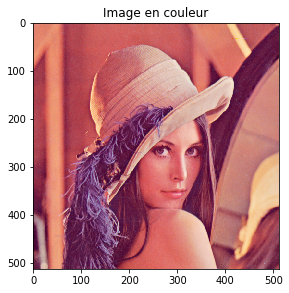

In [106]:
img = io.imread("images-TP1\\lena.tiff")
io.imshow(img)
plt.title("Image en couleur")


La conversion d’une image couleur de composantes r, v, b en une image à niveaux de gris de valeur g
est obtenu grâce à la transformation
$g = 0,2125 r + 0,7154 v + 0,0721 b$.
Les coefficients garantissent que $g \in [0,1]$ et ont été obtenus par des mesures psychovisuelles.

4.Convertissez l’image couleur en niveaux de gris (skimage.color.rgb2gray), puis affichez-la.

Text(0.5, 1.0, 'Image en gris')

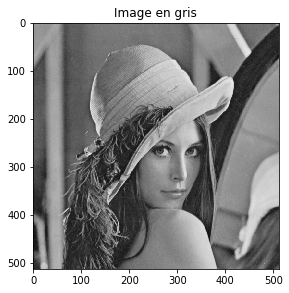

In [107]:
img = io.imread("images-TP1\\lena.tiff")
imgGray = color.rgb2gray(img)
img.dtype
img.size
io.imshow(imgGray)
plt.title("Image en gris")


5.Extraire de l’image une ligne ou une colonne de pixels, puis affichez ce profil de luminosité
sous forme d’un signal (matplotlib.pyplot.plot). Arrivez-vous à retrouver dans ce profil les
différentes zones de l’image ?


Text(0.5, 1.0, 'Profil ligne 200')

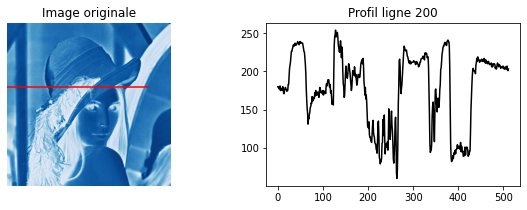

In [108]:
nlign = 200
profil = img[nlign, :, 0]
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax.imshow(img[:, :, 0], cmap='Blues')
ax.set_title("Image originale")
ax.plot((0, 440), (200, 200), 'r')
ax.axis('off')
ax2.plot(profil, color='k')
ax2.set_title('Profil ligne 200')


#  Etude à partir de l'histogramme



# Exercice 1

6.Chargez l'image  forest.png et convertissez-la en niveaux de gris

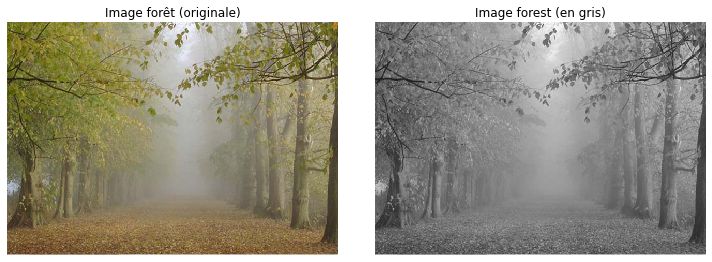

In [109]:
forest = io.imread("images-TP1\\forest.png")
forestgray = color.rgb2gray(forest)
img.dtype
fig = plt.figure(1, figsize=(10, 10))
plt.subplot(121)
io.imshow(forest)
plt.title('Image forêt (originale)')

plt.axis('off')
plt.subplot(122)
io.imshow(forestgray)
plt.title('Image forest (en gris)')
plt.axis('off')
plt.show()


7.Calculez son histogramme avec la fonction skimage.exposure.histogram, puis affichez-le avec
matplotlib.pyplot.bar. Essayez avec plusieurs nombres de barres : que pouvez-vous en dire ?


Text(0.5, 1.0, 'Histogramme 16 bins')

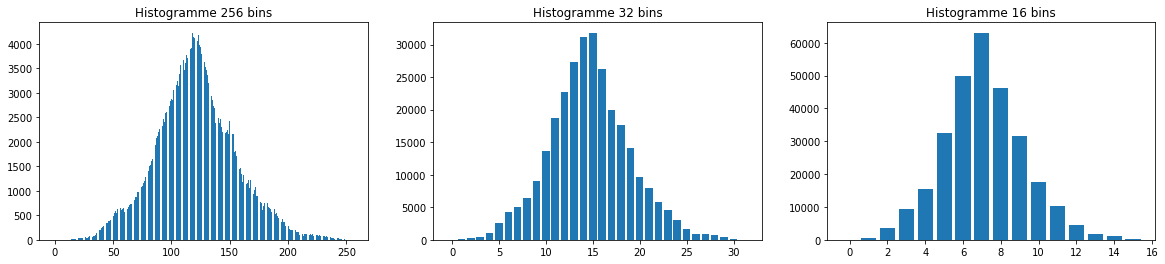

In [110]:
hist, histc = exposure.histogram(forestgray, nbins=256)
hist2, histc2 = exposure.histogram(forestgray, nbins=32)
hist3, histc3 = exposure.histogram(forestgray, nbins=16)

# On cherche les centres
x = [i for i in range(256)]
x2 = [i for i in range(32)]
x3 = [i for i in range(16)]

fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax = ax.ravel()

# On modifie les bins
ax[0].bar(x, hist)
ax[0].set_title("Histogramme 256 bins")

ax[1].bar(x2, hist2)
ax[1].set_title("Histogramme 32 bins")

ax[2].bar(x3, hist3)
ax[2].set_title("Histogramme 16 bins")


8.Vous constaterez que l’image est peu contrastée : comment cela se
traduit-il sur l’histogramme ?


In [111]:
# L'image est un peu contrasté! En effet, on remarque que l'histogramme est plutôt centré et qu'il n'y a pas de valeur aux extrémités.
# Les valeurs sont concentrées sur une plage assez étroites.


9.Multipliez l’image par un réel positif : que se passe-t-il sur l’image et son histogramme ?

In [112]:
# Cela se traduit par une augmentation de la luminosité entre les pixels


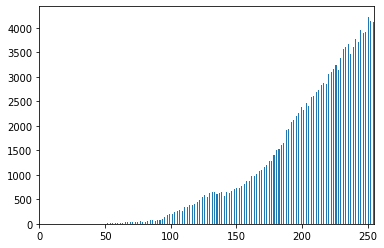

In [113]:
# Charger l'image
image = io.imread("images-TP1\\forest.png", as_gray=True)

# Multiplier l'image par un facteur de 2
image_mult = exposure.rescale_intensity(
    image, in_range=(0, 1), out_range=(0, 255)) * 2

# Calculer l'histogramme de l'image multipliée
hist, bins = exposure.histogram(image_mult, nbins=256)

# Tracer l'histogramme
plt.bar(bins, hist, width=0.8)
plt.xlim([0, 255])
plt.show()


In [114]:
# On a donc augmenté le contraste car le spectre de l'histogramme est plus étendu.


10. Binariser l'image avec un seuil adéquat. Vous justifierez ce seuil par l'analyse de l'histogramme

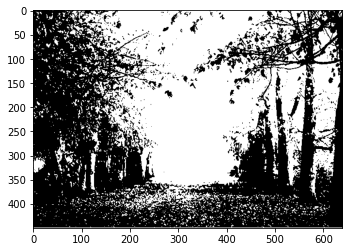

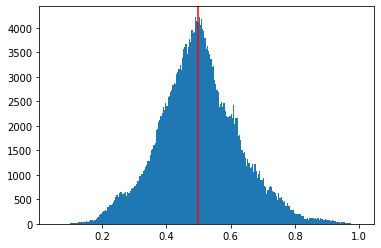

In [115]:
# On prend un seuil aléatoire
seuil = 0.5

# Binariser l'image avec le seuil optimal
image_binary = image > seuil

# Afficher l'image binaire
plt.imshow(image_binary, cmap='gray')
plt.show()

# Afficher l'histogramme de l'image
plt.hist(image.ravel(), bins=256)
plt.axvline(seuil, color='r')
plt.show()


In [116]:
# On prend un seuil qui correspond au maximum sur l'histogramme

Dans un deuxième temps, le seuil est déterminé grâce à la méthode de Otsu.
11. Utilisez skimage.filters.threshold_otsu pour déterminer une valeur de seuil, et affichez la
segmentation résultante.

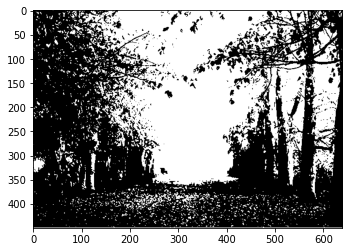

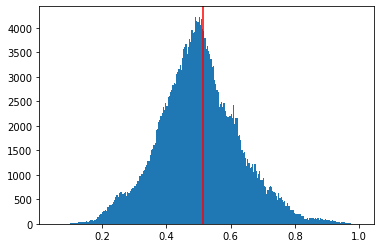

In [117]:
# Calculer le seuil optimal avec la méthode d'Otsu
thresh = threshold_otsu(image)

# Binariser l'image avec le seuil optimal
image_binary = image > thresh

# Afficher l'image binaire
plt.imshow(image_binary, cmap='gray')
plt.show()

# Afficher l'histogramme de l'image
plt.hist(image.ravel(), bins=256)
plt.axvline(thresh, color='r')
plt.show()


In [118]:
# Le seuil peut être choisi de différentes manières, par exemple en cherchant le point de transition
# dans l'histogramme, où il y a une forte différence de nombre de pixels entre les niveaux de gris.


# Exercice 2

12.On souhaite segmenter les pièces de monnaie de l’image coins1.png. Dans une premier temps, le choix
du seuil est effectué à partir de l’histogramme de l’image.

13.Affichez l’histogramme de l’image coins1.png, et déduisez-en un seuil pour segmenter l’image.
L’image seuillée image2 est obtenue à partir de l’image image1 et le seuil

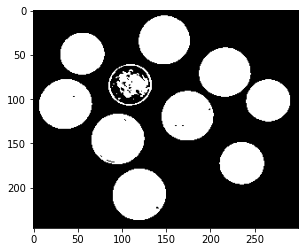

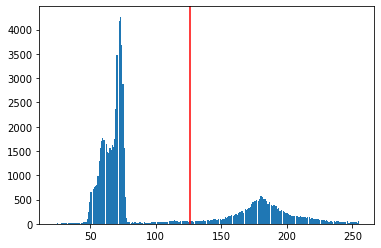

In [119]:
# On lit l'image
image_coins = io.imread("images-TP1\\coins1.png")

thresh = threshold_otsu(image_coins)
# Afficher l'histogramme de l'image
image_binary = image_coins > thresh

# Afficher l'image binaire
plt.imshow(image_binary, cmap='gray')
plt.show()

# Afficher l'histogramme de l'image
plt.hist(image_coins.ravel(), bins=256)
plt.axvline(thresh, color='r')
plt.show()


Dans un deuxième temps, le seuil est déterminé grâce à la méthode de Otsu.
14. Utilisez skimage.filters.threshold_otsu pour déterminer une valeur de seuil, et affichez la
segmentation résultante.

In [120]:
# Voir ci-dessus


# Morphomathématiques  

# Exercice 1

1.Chargez et affichez l'image cell.png.


Text(0.5, 1.0, 'Image en couleur')

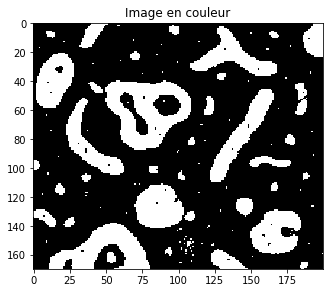

In [121]:
image_cell = io.imread("images-TP1\\cell.png")
io.imshow(image_cell)
plt.title("Image en couleur")


2.Nettoyez l'image en enlevant les petits grains blancs et noirs qui sont dessus.

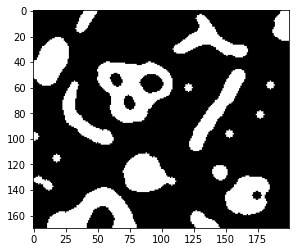

In [122]:
#image_gray = color.rgb2gray(image_cell)

image_gray = io.imread("images-TP1\\cell.png", as_gray=True)
# Appliquer une opération de seuillage pour binariser l'image
thresh = filters.threshold_otsu(image_gray)
image_binary = image_gray > thresh

# Appliquer une opération d'ouverture pour supprimer les petits grains blancs
image_opened = morphology.opening(image_binary, morphology.disk(3))

# Appliquer une opération de fermeture pour supprimer les petits grains noirs
image_closed = morphology.closing(image_opened, morphology.disk(3))

#io.imsave("images-TP1\\Cellule_nettoyee.png", image_closed)

# Afficher l'image nettoyée
plt.imshow(image_closed, cmap='gray')
plt.show()


In [123]:
# L'image est bien nettoyée!


# Exercice 2

L’objectif de cet exercice est de trouver puis de compter le nombre de piscines visibles dans l’image
satellitaire moliets.png. Dans un premier temps, ne cherchez pas à trouver parfaitement toutes les
piscines : implémentez une première méthode qui donne un résultat approximatif de manière automatique.
La plupart des fonctions utiles sont à importer depuis le module skimage.morphology.


1.Appliquez un seuillage sur l’image pour mettre en évidence les piscines. Posez-vous la question
de l’image à utiliser : vaut-il mieux travailler avec l’image initiale, l’image en niveau de gris, une
bande particulière. . . ?


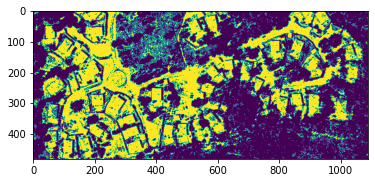

In [124]:
# On va convertir l'image en niveau de gris. Cela va simplifier l'étude de l'image en ne travaillant qu'avec une
# seule valeur de pixel plutôt que 3 (RGB).

image_gray_pool = io.imread("images-TP1\\moliets.png", as_gray=True)
# io.imshow(image_gray_pool)

# On réalise le seuillage Otsu
thresh = filters.threshold_otsu(image_gray_pool)
image_binary_pool = image_gray_pool > thresh

plt.imshow(image_binary_pool)


2.Appliquez les opérateurs morphologiques vus en cours (érosion, dilatation, ouverture, fermeture)
pour observer leur influence et en déduire l’opérateur le plus adapté au problème.

Nombre de piscines détectées : 37


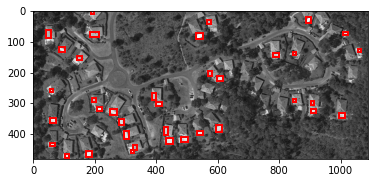

In [125]:
image_gray_pool = io.imread("images-TP1\\moliets.png", as_gray=True)

# Seuillage de l'image pour obtenir une image binaire
thresh = 0.6
image_binary_pool = (image_gray_pool > thresh).astype('uint8')

# Méthode du seuillage Otsu mais MARCHE PAS BIEN

# thresh = filters.threshold_otsu(image_gray_pool)
# image_binary_pool = image_gray_pool > thresh

# Erosion de l'image pour séparer les piscines les unes des autres
sep = morphology.disk(5.2)
eroded_image = morphology.binary_erosion(image_binary_pool, sep)

# Dilatation de l'image pour récupérer les contours des piscines
dilated_image = morphology.binary_dilation(eroded_image, sep)

# Affichage de l'image avec les contours rouges des piscines
rgb_image = color.gray2rgb(image_gray_pool)

labeled_image, num_pools = measure.label(dilated_image, return_num=True)
print("Nombre de piscines détectées :", num_pools)

for region in measure.regionprops(labeled_image):
    # Récupération des coordonnées des coins de la région
    minr, minc, maxr, maxc = region.bbox
    # Dessin d'un rectangle autour de la région
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr -
                         minr, fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)

plt.imshow(rgb_image)
plt.show()


7.Que permet de faire la fonction skimage.measure.regionprops ? En quoi peut-elle être utile
pour compter le nombre de piscines ? Appliquez-la pour déterminer le nombre de piscines

In [126]:
# La méthode skimage.measure.regionprops permet de mesurer les proprités de la région
# sur laquelle on travaille. Notamment, elle permet de récupérer les coordonnées des piscines trouvées
# Par exemple, elle permet de compter le nombre de rectangles tracés sur l'image.
